Tᵢ = 0.50 eV → K_CT = 3.371e-16 m³/s
Tᵢ = 1.00 eV → K_CT = 9.582e-16 m³/s
Tᵢ = 1.50 eV → K_CT = 1.387e-15 m³/s
Tᵢ = 2.00 eV → K_CT = 1.701e-15 m³/s
Tᵢ = 2.50 eV → K_CT = 1.949e-15 m³/s
Tᵢ = 3.00 eV → K_CT = 2.156e-15 m³/s
Tᵢ = 3.50 eV → K_CT = 2.336e-15 m³/s
Tᵢ = 4.00 eV → K_CT = 2.496e-15 m³/s
Tᵢ = 4.50 eV → K_CT = 2.641e-15 m³/s
Tᵢ = 5.00 eV → K_CT = 2.775e-15 m³/s
Tᵢ = 5.50 eV → K_CT = 2.899e-15 m³/s
Tᵢ = 6.00 eV → K_CT = 3.015e-15 m³/s
Tᵢ = 6.50 eV → K_CT = 3.124e-15 m³/s
Tᵢ = 7.00 eV → K_CT = 3.228e-15 m³/s
Tᵢ = 7.50 eV → K_CT = 3.326e-15 m³/s
Tᵢ = 8.00 eV → K_CT = 3.421e-15 m³/s
Tᵢ = 8.50 eV → K_CT = 3.512e-15 m³/s
Tᵢ = 9.00 eV → K_CT = 3.599e-15 m³/s
Tᵢ = 9.50 eV → K_CT = 3.683e-15 m³/s
Tᵢ = 10.00 eV → K_CT = 3.764e-15 m³/s


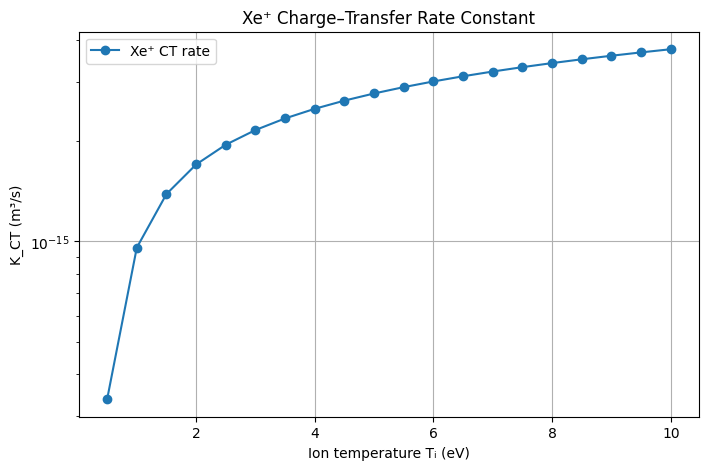

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import UnivariateSpline

# ── 1) Load your DBP charge‐transfer data ─────────────────────────────────────
df = pd.read_excel(
    r'c:/Users/khoi2/Documents/UIUC Docs/UIUC Aerospace/Research/Charge Transfer - Khoi.xlsx',
    sheet_name='Cross Sections'
)

# Replace these column names with whatever your file actually uses:
E_i_eV   = df['DBP w/ spin Energy']       .dropna().values   # ion energy points
sigma_A2 = df['DBP w/ spin Cross Sections'] .dropna().values   # σ in Å²

# ── 2) Convert to SI ───────────────────────────────────────────────────────────
e_charge = 1.602176634e-19            # J/eV
amu       = 1.66053906660e-27           # kg
m_i       = 131.29 * amu                   # Xe⁺ mass in kg

# cross‐section from Å² → m²
sigma_ct = sigma_A2 * 1e-20

# compute ion speeds v = √(2 E e / m_i)
v_ion = np.sqrt(2 * E_i_eV * e_charge / m_i)

# ── 3) Sort (v, σ) pairs ───────────────────────────────────────────────────────
sort_idx    = np.argsort(v_ion)
v_sorted    = v_ion[sort_idx]
sigma_sorted= sigma_ct[sort_idx]
v_min, v_max= v_sorted[0], v_sorted[-1]

# ── 4) Thermal‐average over an ion Maxwellian ──────────────────────────────────
T_i_eV   = np.linspace(0.5, 10, 20)     # ion temps in eV
K_ct     = np.zeros_like(T_i_eV)

for i, T in enumerate(T_i_eV):
    exponent       = -m_i * v_sorted**2 / (2 * e_charge * T)
    integrand_vals = sigma_sorted * v_sorted**3 * np.exp(exponent)

    spline         = UnivariateSpline(v_sorted, integrand_vals, s=0, ext='zeros')
    integral, _    = quad(spline, v_min, v_max, limit=1000)

    prefactor      = 4 * np.pi * (m_i / (2 * np.pi * e_charge * T))**1.5
    K_ct[i]        = prefactor * integral

    print(f"Tᵢ = {T:.2f} eV → K_CT = {K_ct[i]:.3e} m³/s")

# ── 5) Plot ───────────────────────────────────────────────────────────────────
plt.figure(figsize=(8,5))
plt.plot(T_i_eV, K_ct, 'o-', label='Xe⁺ CT rate')
plt.yscale('log')
plt.grid(True)
plt.xlabel('Ion temperature Tᵢ (eV)')
plt.ylabel('K_CT (m³/s)')
plt.legend()
plt.title('Xe⁺ Charge–Transfer Rate Constant')
plt.show()


Tᵢ = 0.50 eV → K_CT = 3.835e-16 m³/s
Tᵢ = 1.00 eV → K_CT = 8.655e-16 m³/s
Tᵢ = 1.50 eV → K_CT = 1.171e-15 m³/s
Tᵢ = 2.00 eV → K_CT = 1.392e-15 m³/s
Tᵢ = 2.50 eV → K_CT = 1.567e-15 m³/s
Tᵢ = 3.00 eV → K_CT = 1.715e-15 m³/s
Tᵢ = 3.50 eV → K_CT = 1.845e-15 m³/s
Tᵢ = 4.00 eV → K_CT = 1.960e-15 m³/s
Tᵢ = 4.50 eV → K_CT = 2.066e-15 m³/s
Tᵢ = 5.00 eV → K_CT = 2.163e-15 m³/s
Tᵢ = 5.50 eV → K_CT = 2.253e-15 m³/s
Tᵢ = 6.00 eV → K_CT = 2.338e-15 m³/s
Tᵢ = 6.50 eV → K_CT = 2.418e-15 m³/s
Tᵢ = 7.00 eV → K_CT = 2.495e-15 m³/s
Tᵢ = 7.50 eV → K_CT = 2.567e-15 m³/s
Tᵢ = 8.00 eV → K_CT = 2.637e-15 m³/s
Tᵢ = 8.50 eV → K_CT = 2.703e-15 m³/s
Tᵢ = 9.00 eV → K_CT = 2.767e-15 m³/s
Tᵢ = 9.50 eV → K_CT = 2.829e-15 m³/s
Tᵢ = 10.00 eV → K_CT = 2.889e-15 m³/s


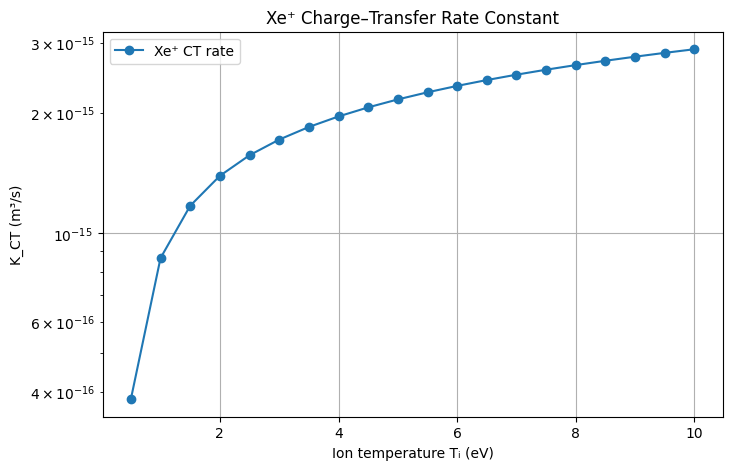

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import UnivariateSpline

# ── 1) Load your DBP charge‐transfer data ─────────────────────────────────────
df = pd.read_excel(
    r'c:/Users/khoi2/Documents/UIUC Docs/UIUC Aerospace/Research/Charge Transfer - Khoi.xlsx',
    sheet_name='Cross Sections'
)

# Replace these column names with whatever your file actually uses:
E_i_eV   = df['Energy 1 Electron']       .dropna().values   # ion energy points
sigma_A2 = df['Cross Section 1 Electrion'] .dropna().values   # σ in Å²

# ── 2) Convert to SI ───────────────────────────────────────────────────────────
e_charge = 1.602176634e-19              # J/eV
amu       = 1.66053906660e-27           # kg
m_i       = 131.29 * amu                   # Xe⁺ mass in kg

# cross‐section from Å² → m²
sigma_ct = sigma_A2 * 1e-20

# compute ion speeds v = √(2 E e / m_i)
v_ion = np.sqrt(2 * E_i_eV * e_charge / m_i)

# ── 3) Sort (v, σ) pairs ───────────────────────────────────────────────────────
sort_idx    = np.argsort(v_ion)
v_sorted    = v_ion[sort_idx]
sigma_sorted= sigma_ct[sort_idx]
v_min, v_max= v_sorted[0], v_sorted[-1]

# ── 4) Thermal‐average over an ion Maxwellian ──────────────────────────────────
T_i_eV   = np.linspace(0.5, 10, 20)     # ion temps in eV
K_ct     = np.zeros_like(T_i_eV)

for i, T in enumerate(T_i_eV):
    exponent       = -m_i * v_sorted**2 / (2 * e_charge * T)
    integrand_vals = sigma_sorted * v_sorted**3 * np.exp(exponent)

    spline         = UnivariateSpline(v_sorted, integrand_vals, s=0, ext='zeros')
    integral, _    = quad(spline, v_min, v_max, limit=1000)

    prefactor      = 4 * np.pi * (m_i / (2 * np.pi * e_charge * T))**1.5
    K_ct[i]        = prefactor * integral

    print(f"Tᵢ = {T:.2f} eV → K_CT = {K_ct[i]:.3e} m³/s")

# ── 5) Plot ───────────────────────────────────────────────────────────────────
plt.figure(figsize=(8,5))
plt.plot(T_i_eV, K_ct, 'o-', label='Xe⁺ CT rate')
plt.yscale('log')
plt.grid(True)
plt.xlabel('Ion temperature Tᵢ (eV)')
plt.ylabel('K_CT (m³/s)')
plt.legend()
plt.title('Xe⁺ Charge–Transfer Rate Constant')
plt.show()


Tᵢ = 0.50 eV → K_CT = 2.884e-16 m³/s
Tᵢ = 1.00 eV → K_CT = 7.347e-16 m³/s
Tᵢ = 1.50 eV → K_CT = 1.029e-15 m³/s
Tᵢ = 2.00 eV → K_CT = 1.242e-15 m³/s
Tᵢ = 2.50 eV → K_CT = 1.411e-15 m³/s
Tᵢ = 3.00 eV → K_CT = 1.554e-15 m³/s
Tᵢ = 3.50 eV → K_CT = 1.677e-15 m³/s
Tᵢ = 4.00 eV → K_CT = 1.788e-15 m³/s
Tᵢ = 4.50 eV → K_CT = 1.889e-15 m³/s
Tᵢ = 5.00 eV → K_CT = 1.982e-15 m³/s
Tᵢ = 5.50 eV → K_CT = 2.068e-15 m³/s
Tᵢ = 6.00 eV → K_CT = 2.150e-15 m³/s
Tᵢ = 6.50 eV → K_CT = 2.226e-15 m³/s
Tᵢ = 7.00 eV → K_CT = 2.299e-15 m³/s
Tᵢ = 7.50 eV → K_CT = 2.368e-15 m³/s
Tᵢ = 8.00 eV → K_CT = 2.434e-15 m³/s
Tᵢ = 8.50 eV → K_CT = 2.498e-15 m³/s
Tᵢ = 9.00 eV → K_CT = 2.559e-15 m³/s
Tᵢ = 9.50 eV → K_CT = 2.618e-15 m³/s
Tᵢ = 10.00 eV → K_CT = 2.675e-15 m³/s


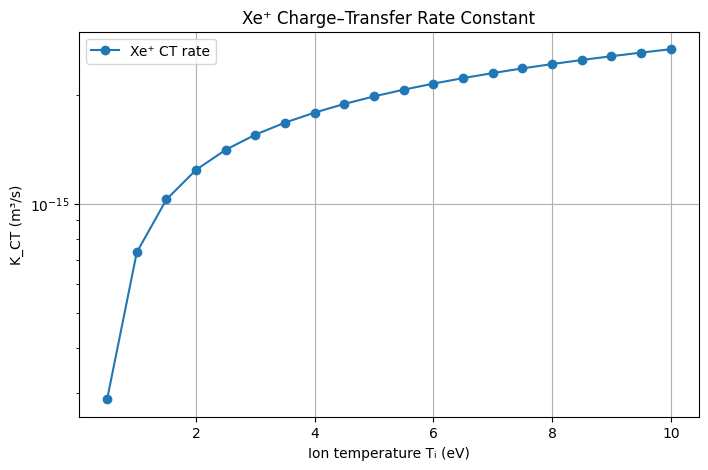

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import UnivariateSpline

# ── 1) Load your DBP charge‐transfer data ─────────────────────────────────────
df = pd.read_excel(
    r'c:/Users/khoi2/Documents/UIUC Docs/UIUC Aerospace/Research/Charge Transfer - Khoi.xlsx',
    sheet_name='Cross Sections'
)

# Replace these column names with whatever your file actually uses:
E_i_eV   = df['Energy RF']       .dropna().values   # ion energy points
sigma_A2 = df['Cross Section RF'] .dropna().values   # σ in Å²

# ── 2) Convert to SI ───────────────────────────────────────────────────────────
e_charge = 1.602176634e-19              # J/eV
amu       = 1.66053906660e-27           # kg
m_i       = 131.29 * amu                   # Xe⁺ mass in kg

# cross‐section from Å² → m²
sigma_ct = sigma_A2 * 1e-20

# compute ion speeds v = √(2 E e / m_i)
v_ion = np.sqrt(2 * E_i_eV * e_charge / m_i)

# ── 3) Sort (v, σ) pairs ───────────────────────────────────────────────────────
sort_idx    = np.argsort(v_ion)
v_sorted    = v_ion[sort_idx]
sigma_sorted= sigma_ct[sort_idx]
v_min, v_max= v_sorted[0], v_sorted[-1]

# ── 4) Thermal‐average over an ion Maxwellian ──────────────────────────────────
T_i_eV   = np.linspace(0.5, 10, 20)     # ion temps in eV
K_ct     = np.zeros_like(T_i_eV)

for i, T in enumerate(T_i_eV):
    exponent       = -m_i * v_sorted**2 / (2 * e_charge * T)
    integrand_vals = sigma_sorted * v_sorted**3 * np.exp(exponent)

    spline         = UnivariateSpline(v_sorted, integrand_vals, s=0, ext='zeros')
    integral, _    = quad(spline, v_min, v_max, limit=1000)

    prefactor      = 4 * np.pi * (m_i / (2 * np.pi * e_charge * T))**1.5
    K_ct[i]        = prefactor * integral

    print(f"Tᵢ = {T:.2f} eV → K_CT = {K_ct[i]:.3e} m³/s")

# ── 5) Plot ───────────────────────────────────────────────────────────────────
plt.figure(figsize=(8,5))
plt.plot(T_i_eV, K_ct, 'o-', label='Xe⁺ CT rate')
plt.yscale('log')
plt.grid(True)
plt.xlabel('Ion temperature Tᵢ (eV)')
plt.ylabel('K_CT (m³/s)')
plt.legend()
plt.title('Xe⁺ Charge–Transfer Rate Constant')
plt.show()
